In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data_path = "forecasting_case_study.xlsx"
sales_data = pd.read_excel(data_path)
sales_data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [3]:
sales_data.duplicated().sum()

0

In [4]:
sales_data.isna().sum()

Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64

First we check wheter there is any replicate rows or any NA values in the dataframe, and the result shows that there is none.

In [6]:
for col in sales_data.iloc[:, 4:]:
    print(col, ":", sales_data[col].unique())

In-Store Promo : [0 1]
Catalogue Promo : [0 1]
Store End Promo : [0 1]
Google_Mobility : [  0.     2.36   3.3    3.9    3.81   3.01   0.26 -15.7  -26.63 -28.49
 -27.3  -24.28 -22.58 -18.18 -15.91 -15.27 -13.24 -10.86 -10.13  -8.68
  -8.57  -7.5   -8.04  -9.36  -8.77  -9.93 -11.65 -13.23 -20.35 -19.41
 -18.83 -16.44  -7.28  -9.87  -7.79  -9.73  -7.39  -7.56  -8.39  -7.43
  -5.95  -7.2   -5.96  -5.3   -4.38  -4.74 -10.27  -6.95]
Covid_Flag : [0 1]
V_DAY : [0 1]
EASTER : [0 1]
CHRISTMAS : [0 1]


Then we check the values for the non-obvious columns to see whether they are categorical variables or numerical variable. For numerical variables, we can look for outliers and skewness. From above unique values in each row, we can see that only `Google_Mobility` (together with `Sales` and `Price Discount` which are ovbiously numerical) is numerical, and all other variables are categorical. 

SKU1 - Sales
10     108159
46     155253
96     109917
98     174994
115    119393
139    106885
150    258874
151    124261
Name: Sales, dtype: int64


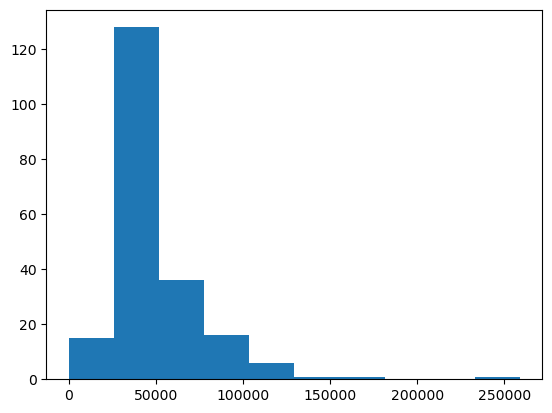

SKU1 - Price Discount (%)
10     0.44
32     0.44
34     0.44
39     0.44
57     0.44
70     0.44
84     0.44
91     0.44
96     0.44
115    0.44
122    0.44
139    0.44
150    0.44
151    0.44
172    0.45
188    0.44
Name: Price Discount (%), dtype: float64


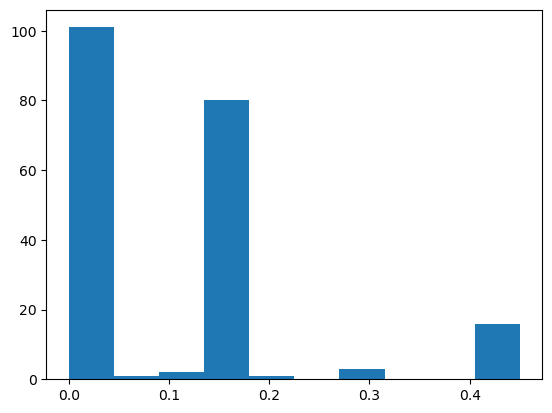

SKU1 - Google_Mobility
163   -15.70
164   -26.63
165   -28.49
166   -27.30
167   -24.28
168   -22.58
169   -18.18
170   -15.91
171   -15.27
184   -20.35
185   -19.41
186   -18.83
187   -16.44
Name: Google_Mobility, dtype: float64


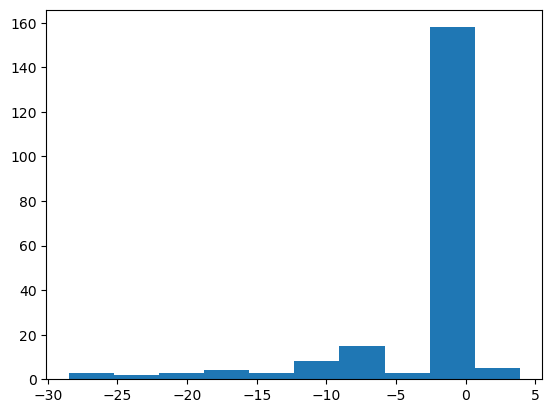

SKU2 - Sales
210    41915
219    52122
224    33566
242    40527
257    32549
270    41316
276    42002
291    32900
322    36674
328    37065
344    40111
350    39870
359    30409
388    34327
396    40169
Name: Sales, dtype: int64


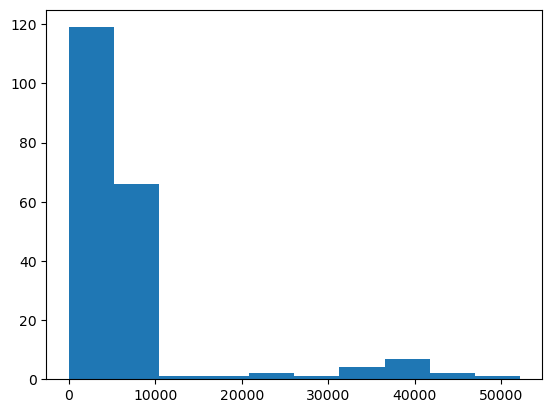

SKU2 - Price Discount (%)
210    0.5
219    0.5
224    0.5
242    0.5
257    0.5
265    0.5
270    0.5
276    0.5
291    0.5
311    0.5
322    0.5
328    0.5
344    0.5
350    0.5
359    0.5
388    0.5
396    0.5
400    0.5
Name: Price Discount (%), dtype: float64


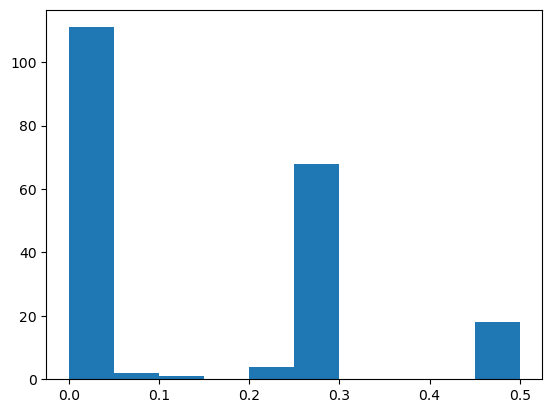

SKU2 - Google_Mobility
367   -15.70
368   -26.63
369   -28.49
370   -27.30
371   -24.28
372   -22.58
373   -18.18
374   -15.91
375   -15.27
388   -20.35
389   -19.41
390   -18.83
391   -16.44
Name: Google_Mobility, dtype: float64


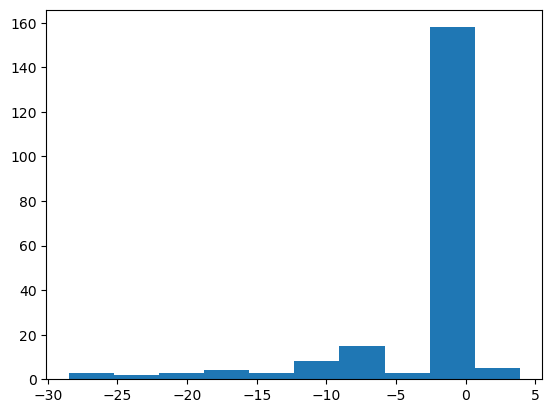

SKU3 - Sales
421    212245
426    248373
437    236242
447    212947
478    288322
494    237462
514    195088
530    197503
540    224723
546    207356
552    182891
566    187548
588    184365
592    189965
Name: Sales, dtype: int64


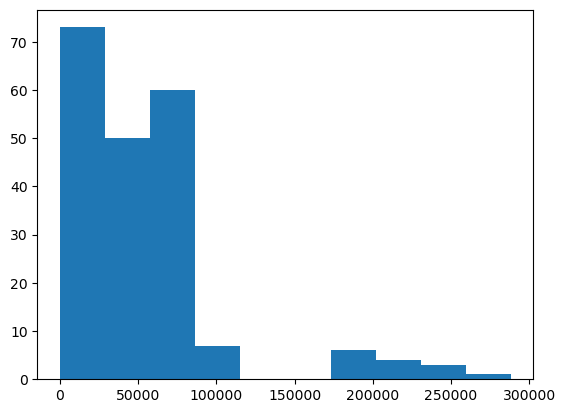

SKU3 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


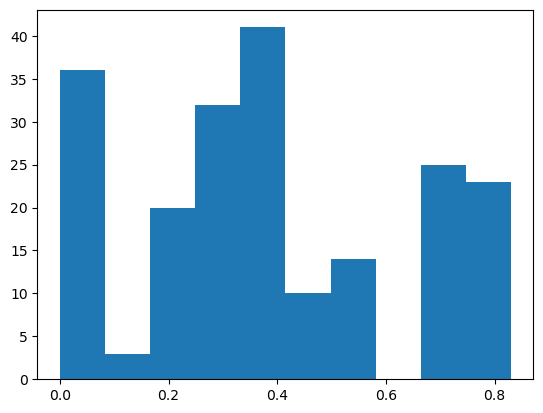

SKU3 - Google_Mobility
571   -15.70
572   -26.63
573   -28.49
574   -27.30
575   -24.28
576   -22.58
577   -18.18
578   -15.91
579   -15.27
592   -20.35
593   -19.41
594   -18.83
595   -16.44
Name: Google_Mobility, dtype: float64


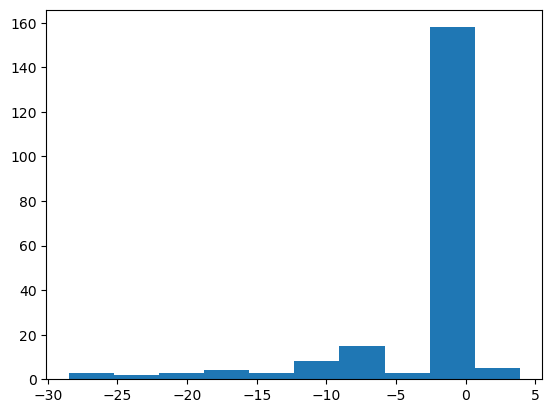

SKU4 - Sales
625    65464
630    63256
641    75377
651    69467
682    72261
698    66114
718    63842
734    59637
744    64115
750    56430
756    54996
770    58091
792    76346
796    81301
Name: Sales, dtype: int64


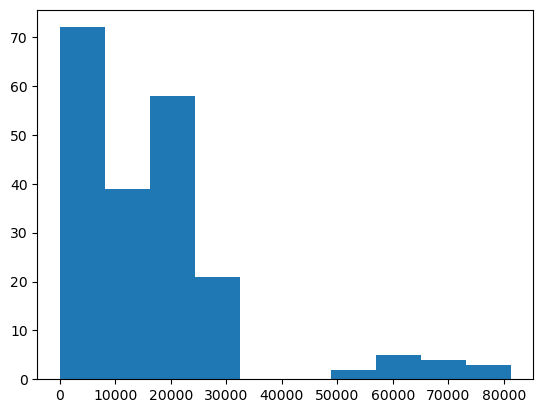

SKU4 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


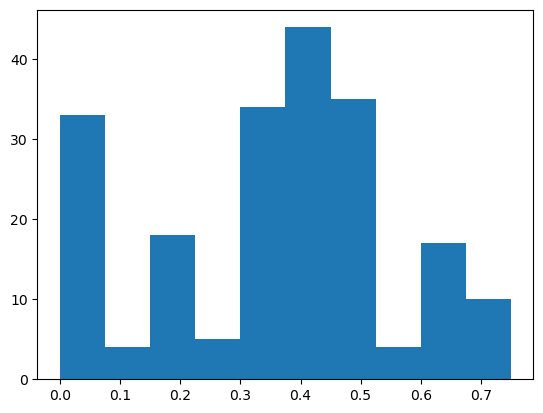

SKU4 - Google_Mobility
775   -15.70
776   -26.63
777   -28.49
778   -27.30
779   -24.28
780   -22.58
781   -18.18
782   -15.91
783   -15.27
796   -20.35
797   -19.41
798   -18.83
799   -16.44
Name: Google_Mobility, dtype: float64


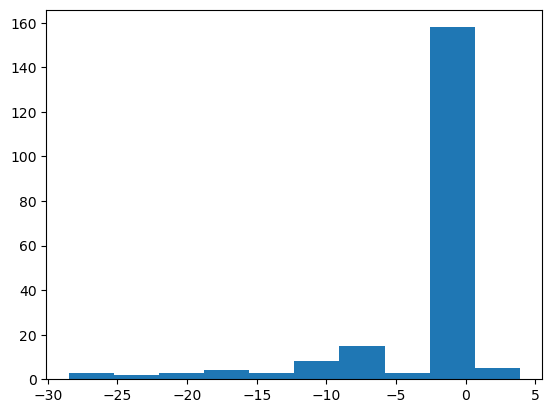

SKU5 - Sales
838    55905
844    73114
849    55567
856    50485
866    51114
885    55160
889    56275
934    47061
938    57064
941    61658
947    63644
952    56807
956    57496
987    61753
996    73058
Name: Sales, dtype: int64


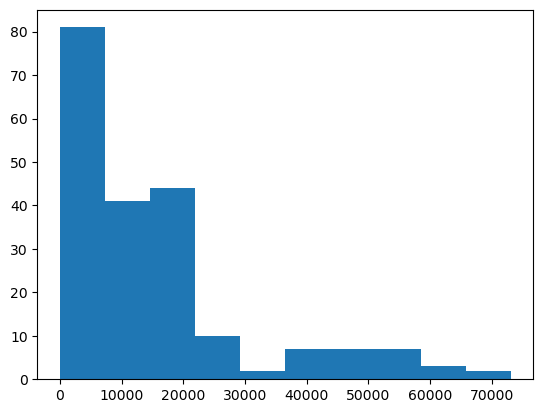

SKU5 - Price Discount (%)
Series([], Name: Price Discount (%), dtype: float64)


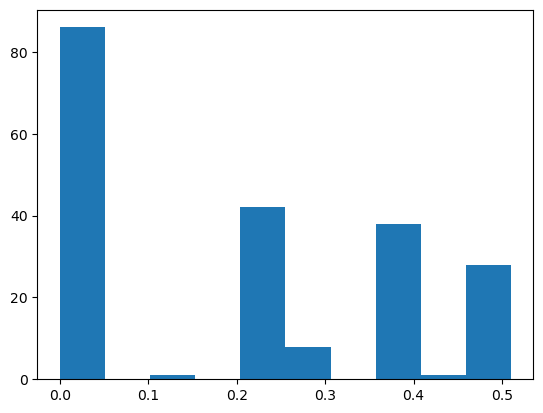

SKU5 - Google_Mobility
979    -15.70
980    -26.63
981    -28.49
982    -27.30
983    -24.28
984    -22.58
985    -18.18
986    -15.91
987    -15.27
1000   -20.35
1001   -19.41
1002   -18.83
1003   -16.44
Name: Google_Mobility, dtype: float64


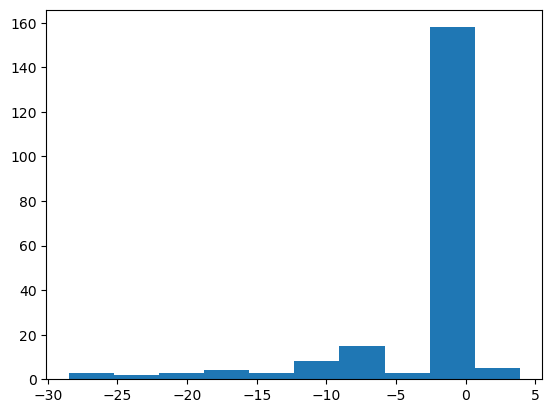

SKU6 - Sales
1025    118504
1037    142953
1041    131072
1046    118276
1053    129254
1057    154098
1058    241114
1089    128647
1105    127468
1109    140995
1110    181833
1161    138789
1162    143887
1163    163536
1214    115798
1215    152186
Name: Sales, dtype: int64


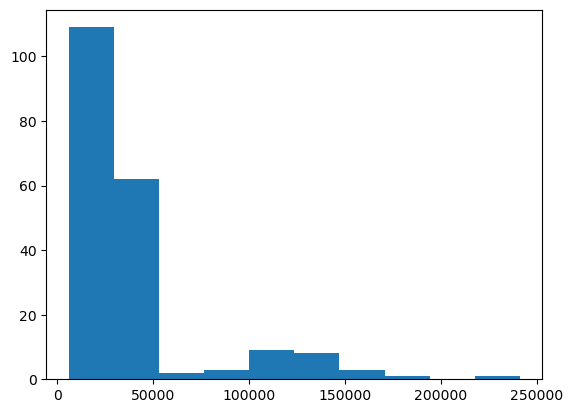

SKU6 - Price Discount (%)
1173    0.69
1175    0.69
1177    0.69
1179    0.69
1181    0.69
1183    0.69
Name: Price Discount (%), dtype: float64


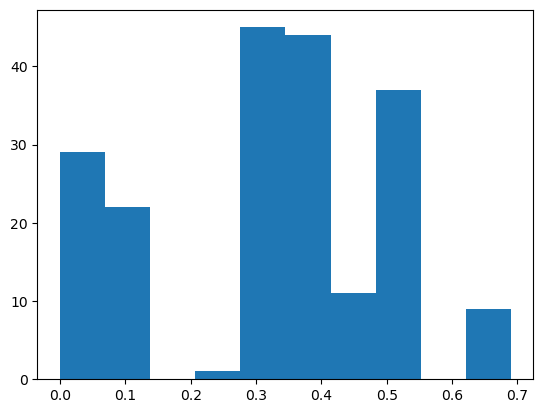

SKU6 - Google_Mobility
1183   -15.70
1184   -26.63
1185   -28.49
1186   -27.30
1187   -24.28
1188   -22.58
1189   -18.18
1190   -15.91
1191   -15.27
1204   -20.35
1205   -19.41
1206   -18.83
1207   -16.44
Name: Google_Mobility, dtype: float64


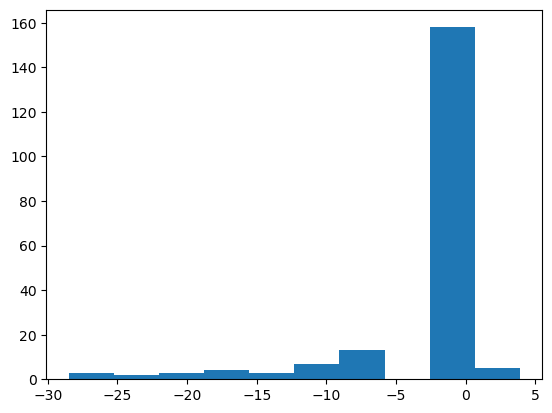

In [8]:
for i in range(1, 7):
    product = "SKU" + str(i)
    product_data = sales_data[sales_data["Product"] == product]
    for col in ["Sales", "Price Discount (%)", "Google_Mobility"]:
        col_data = product_data[col]
        z_scores = np.abs(stats.zscore(col_data.dropna()))
        outliers = np.where(z_scores > 2)[0]  # outliers have z-score > 2
        print(product, "-", col)
        print(product_data.iloc[outliers][col])
        plt.hist(col_data)
        plt.show()

We can see that for all products, `Sales` is right skewed and `Google_Mobility` is left skewed, while `Price Discount (%)` is more randomly scattered. There are some outliers in each category. We believe that since discount is scattered everwhere, and a lot of the outliers are actually the same value, so they are not truely outliers, but just the nature of the data. Therefore, we will not remove those. While for the other two columns, I believe we need to farther investigate into the patterns of the data before deciding whether they are turely outliers. If there are true outliers, we would want to replace with mean of the column. This is because each data point is important in analyzing the trends and we cannot simply remove columns with outliers.

## Check if there is any Missing values

We checking whether there are missing weeks in the data by checking the number of weeks between the beginning date with the end date.

In [12]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   float64       
 4   In-Store Promo      1218 non-null   int64         
 5   Catalogue Promo     1218 non-null   int64         
 6   Store End Promo     1218 non-null   int64         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int64         
 9   V_DAY               1218 non-null   int64         
 10  EASTER              1218 non-null   int64         
 11  CHRISTMAS           1218 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 114.3+ KB


In [13]:
weekly_data = pd.DataFrame(pd.date_range(start=sales_data['date'].min(),end=sales_data['date'].max(),freq='W'))
weekly_data.rename(columns={weekly_data.columns[0]: "Date"}, inplace = True)
weekly_data.describe()

,Date
count,204
mean,2019-01-16 12:00:00
min,2017-02-05 00:00:00
25%,2018-01-26 06:00:00
50%,2019-01-16 12:00:00
75%,2020-01-06 18:00:00
max,2020-12-27 00:00:00


Our data are recorded weekly, and we see that there are 204 weeks in total. For 6 products, we should have 204*6=1224 records, but we only have 1218. So we need to check how many records do we have for each product.

In [15]:
for i in range(1, 7):
    product = "SKU" + str(i)
    product_data = sales_data[sales_data["Product"] == product]
    print(product_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 203
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             204 non-null    object        
 1   date                204 non-null    datetime64[ns]
 2   Sales               204 non-null    int64         
 3   Price Discount (%)  204 non-null    float64       
 4   In-Store Promo      204 non-null    int64         
 5   Catalogue Promo     204 non-null    int64         
 6   Store End Promo     204 non-null    int64         
 7   Google_Mobility     204 non-null    float64       
 8   Covid_Flag          204 non-null    int64         
 9   V_DAY               204 non-null    int64         
 10  EASTER              204 non-null    int64         
 11  CHRISTMAS           204 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 20.7+ KB
None
<class 'pandas.core.frame.Dat

In [16]:
SKU6_data = sales_data[sales_data["Product"] == 'SKU6']
print(SKU6_data['date'].min(), SKU6_data['date'].max())

2017-02-05 00:00:00 2020-11-15 00:00:00


It turns out that we are only missing data from the product `SKU6`, and all the missing dates are towards the end. In other words, if we look at `SKU6` alone, it has no missing data, just an earlier end date. This means that we can analyze `SKU6` with the current data without having to worry about the missing data. Thus for this dataset, we do not need to deal with missing data.

## Outliers

In [19]:
mobility = sales_data[['date', 'Google_Mobility']]
mobility.drop_duplicates(inplace=True)
mobility.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             204 non-null    datetime64[ns]
 1   Google_Mobility  204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_20004\3405096298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobility.drop_duplicates(inplace=True)


By keeping only `date` and `Google_Mobility`, we can see that `Google_Mobility` is the same for each product on a given day, so we only need to analyze it once.

Again, we need to perform analysis separately for each product. We will use `SKU` as an example, decompose the process into steps and explain each step.

In [22]:
product = "SKU1"
product_data = sales_data[sales_data["Product"] == product]
product_data.head()

,Product,date,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
product_series = product_data.set_index('date').asfreq('W')

In [24]:
for col in ["Sales", "Google_Mobility"]:
    col_data = product_series[col]
    z_scores = np.abs(stats.zscore(col_data.dropna()))
    outliers = np.where(z_scores > 2)[0]  # outliers have z-score > 2
    print(product, "-", col)
    print(product_series.iloc[outliers][col])

SKU1 - Sales
date
2017-04-16    108159
2017-12-24    155253
2018-12-09    109917
2018-12-23    174994
2019-04-21    119393
2019-10-06    106885
2019-12-22    258874
2019-12-29    124261
Name: Sales, dtype: int64
SKU1 - Google_Mobility
date
2020-03-22   -15.70
2020-03-29   -26.63
2020-04-05   -28.49
2020-04-12   -27.30
2020-04-19   -24.28
2020-04-26   -22.58
2020-05-03   -18.18
2020-05-10   -15.91
2020-05-17   -15.27
2020-08-16   -20.35
2020-08-23   -19.41
2020-08-30   -18.83
2020-09-06   -16.44
Name: Google_Mobility, dtype: float64


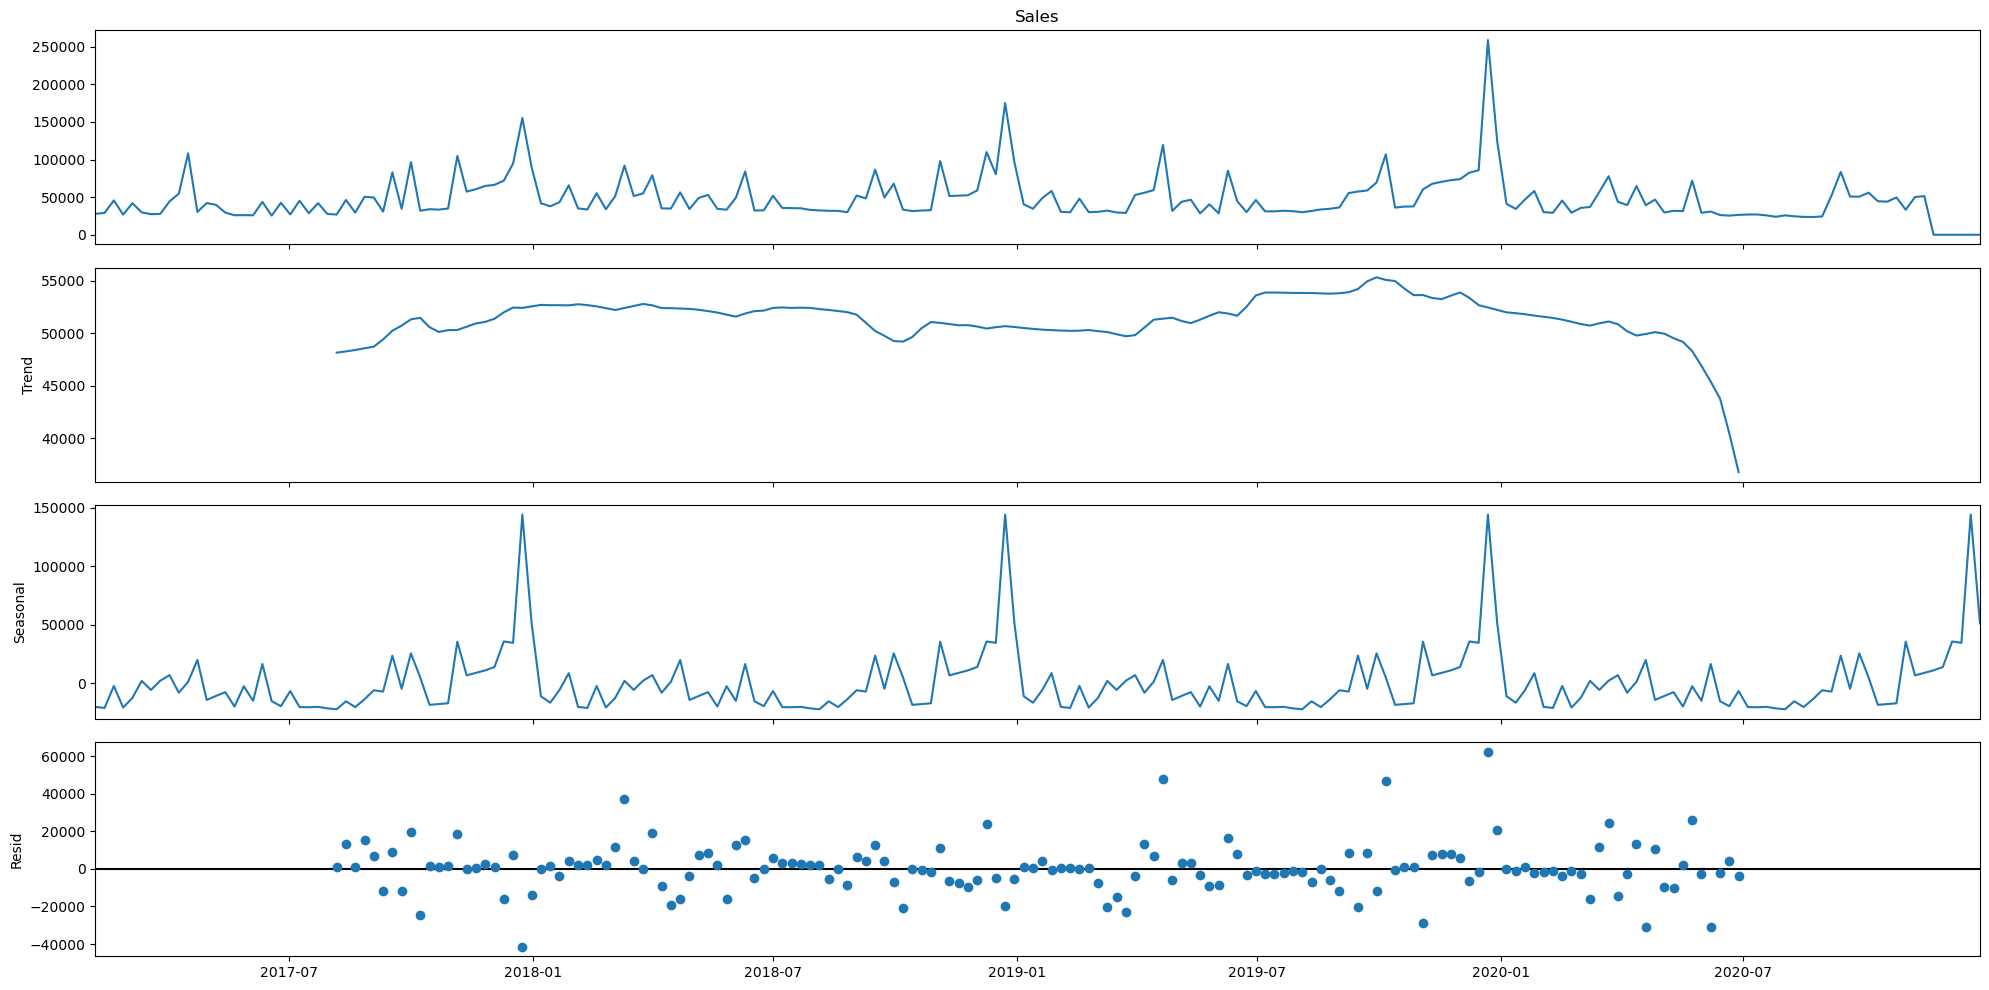

In [25]:
series = pd.Series(product_series['Sales'], index= product_series.index)
results = seasonal_decompose(series, model='additive')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
results.plot()
plt.show()

In [26]:
res = results.resid
z_scores = np.abs(stats.zscore(res.dropna()))
outliers = np.where(z_scores > 2)[0]  # outliers have z-score > 2
print(res.iloc[outliers])

date
2017-06-25             NaN
2017-09-10   -11597.655264
2018-10-21     -664.777059
2019-04-07    13231.995377
2019-05-05     3333.581916
2019-06-23    -3025.732187
2019-10-20      815.136403
2019-12-08    -6650.283469
Name: resid, dtype: float64


As we can see, there is a trend of sales spiking up around Christmas time, so the extreme values are not real outliers. Removing them or taking mean values for them may not be a good idea. We will probably working with this data by transforming it (squre rooting) instead.

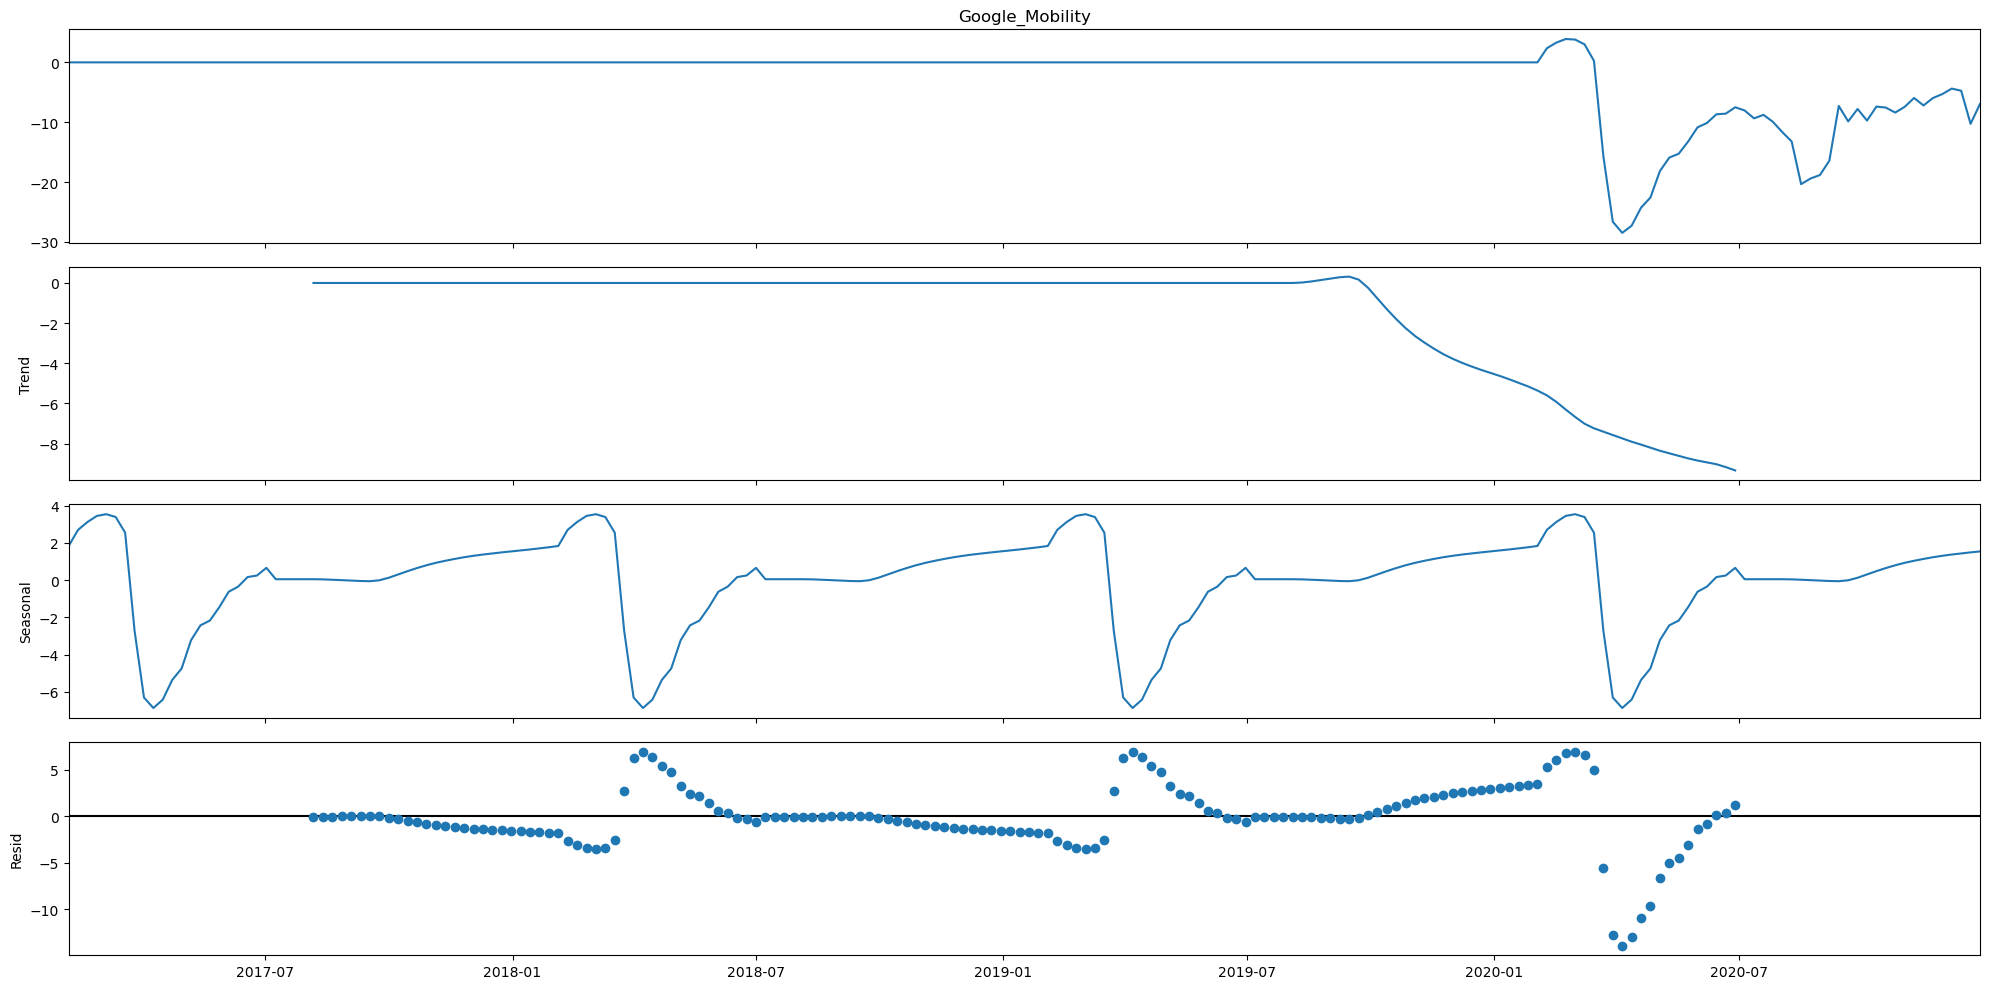

In [28]:
series = pd.Series(product_series['Google_Mobility'], index= product_series.index)
results = seasonal_decompose(series, model='additive')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
results.plot()
plt.show()

The `Google_Mobility` data does not really show any seasonal trend, but judging from the dates, it seems like it has to do with covid and quarantine, and this may be a new indicator that was only put in use after covid.

In [30]:
mobility[mobility['Google_Mobility'] != 0]

,date,Google_Mobility
157,2020-02-09,2.36
158,2020-02-16,3.30
159,2020-02-23,3.90
160,2020-03-01,3.81
161,2020-03-08,3.01
162,2020-03-15,0.26
163,2020-03-22,-15.70
164,2020-03-29,-26.63
165,2020-04-05,-28.49
166,2020-04-12,-27.30


We check with `mobility` which was made earlier to see what are the non-zero values. It is shown that we only get none-zero values after 2020-02-09. Supports the assumption that is was only put in place at a later time. In one hand, we may have outliers because we get too many zero values, in the other hand, this value carries important information relating to how much people go out under impact of covid, so we probably should not remove any outliers here.

Trend for SKU2


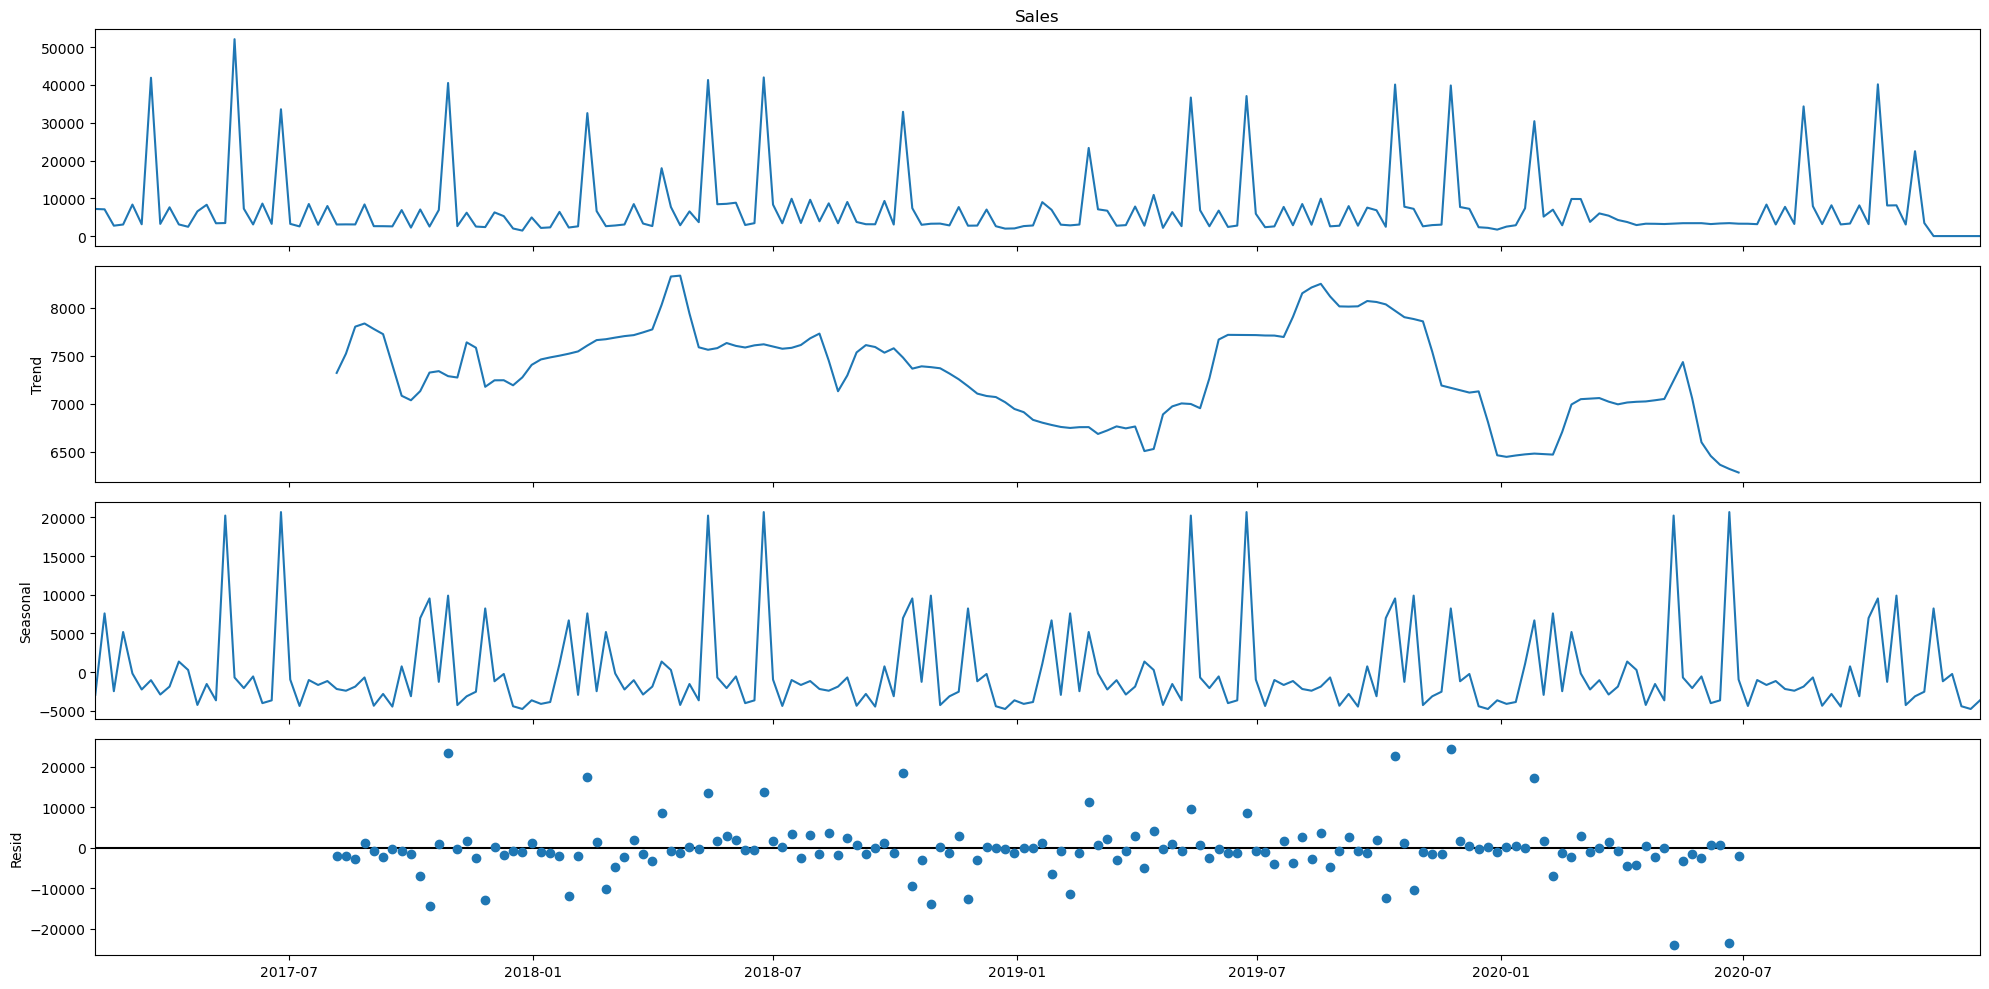

Trend for SKU3


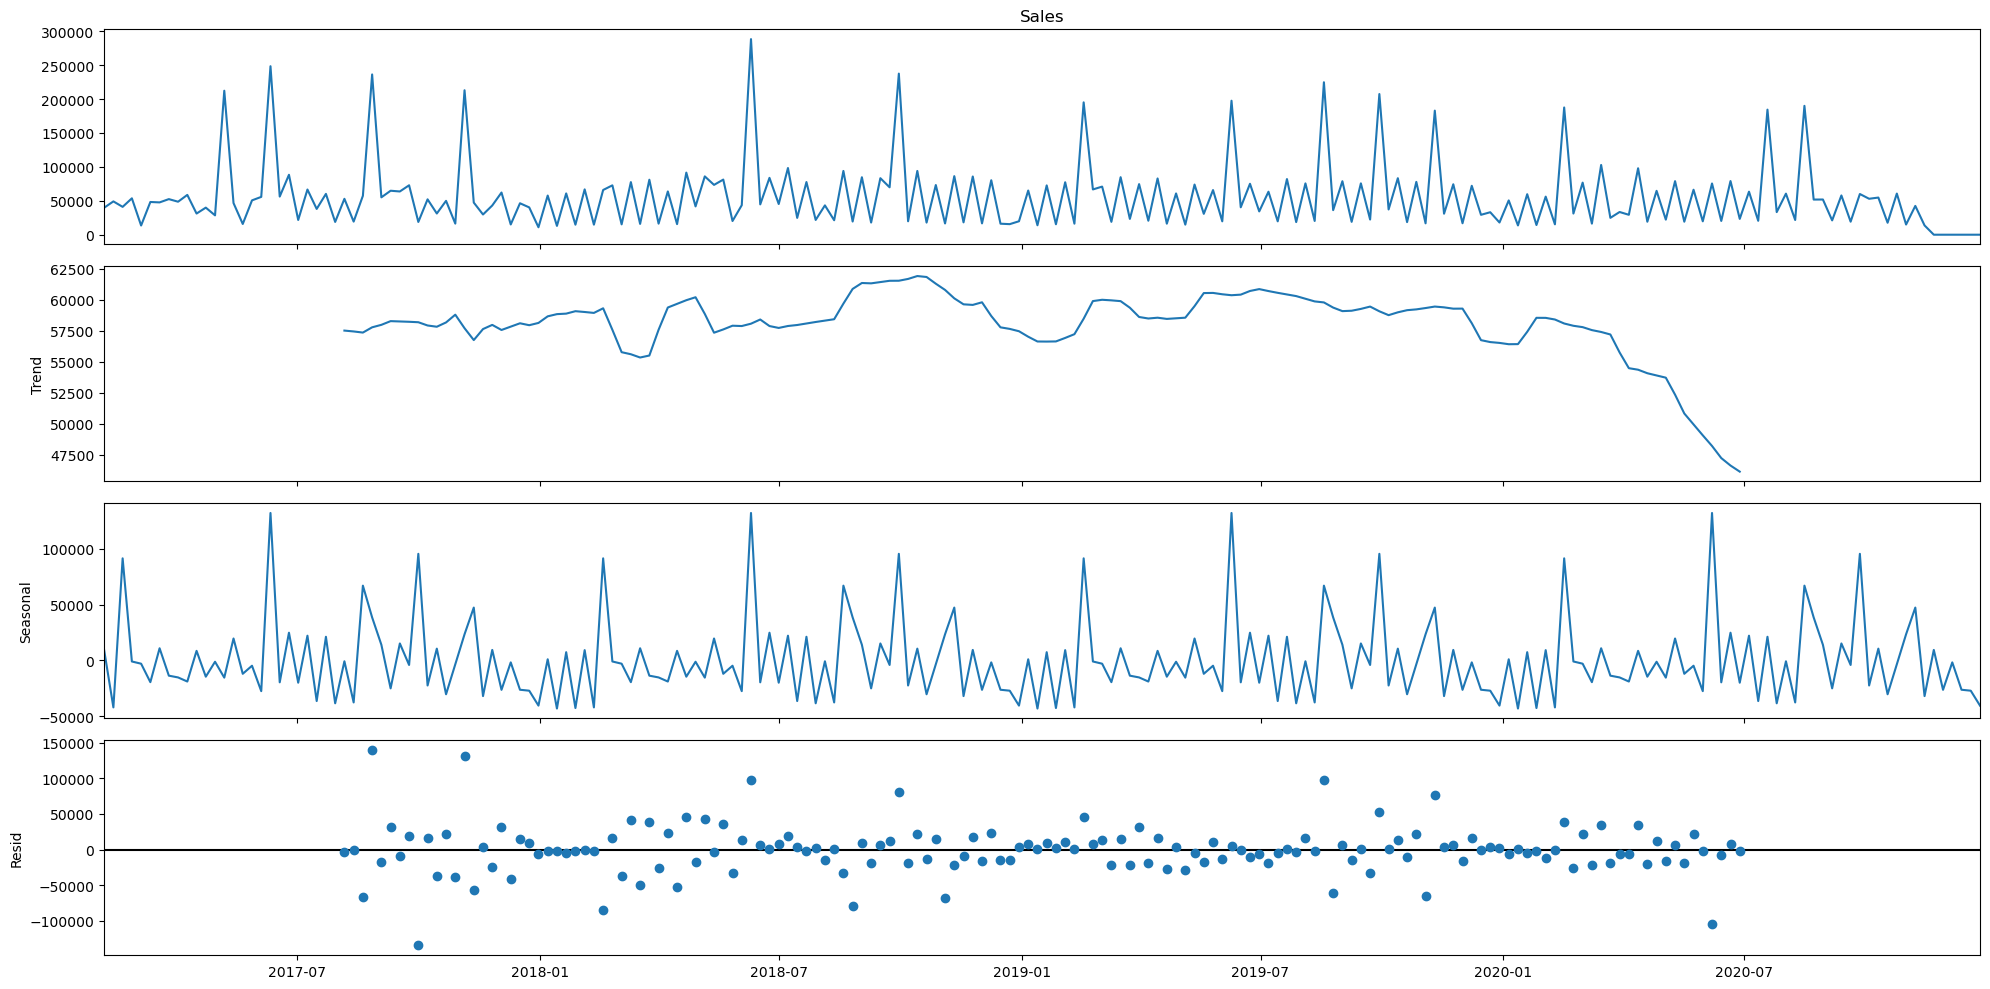

Trend for SKU4


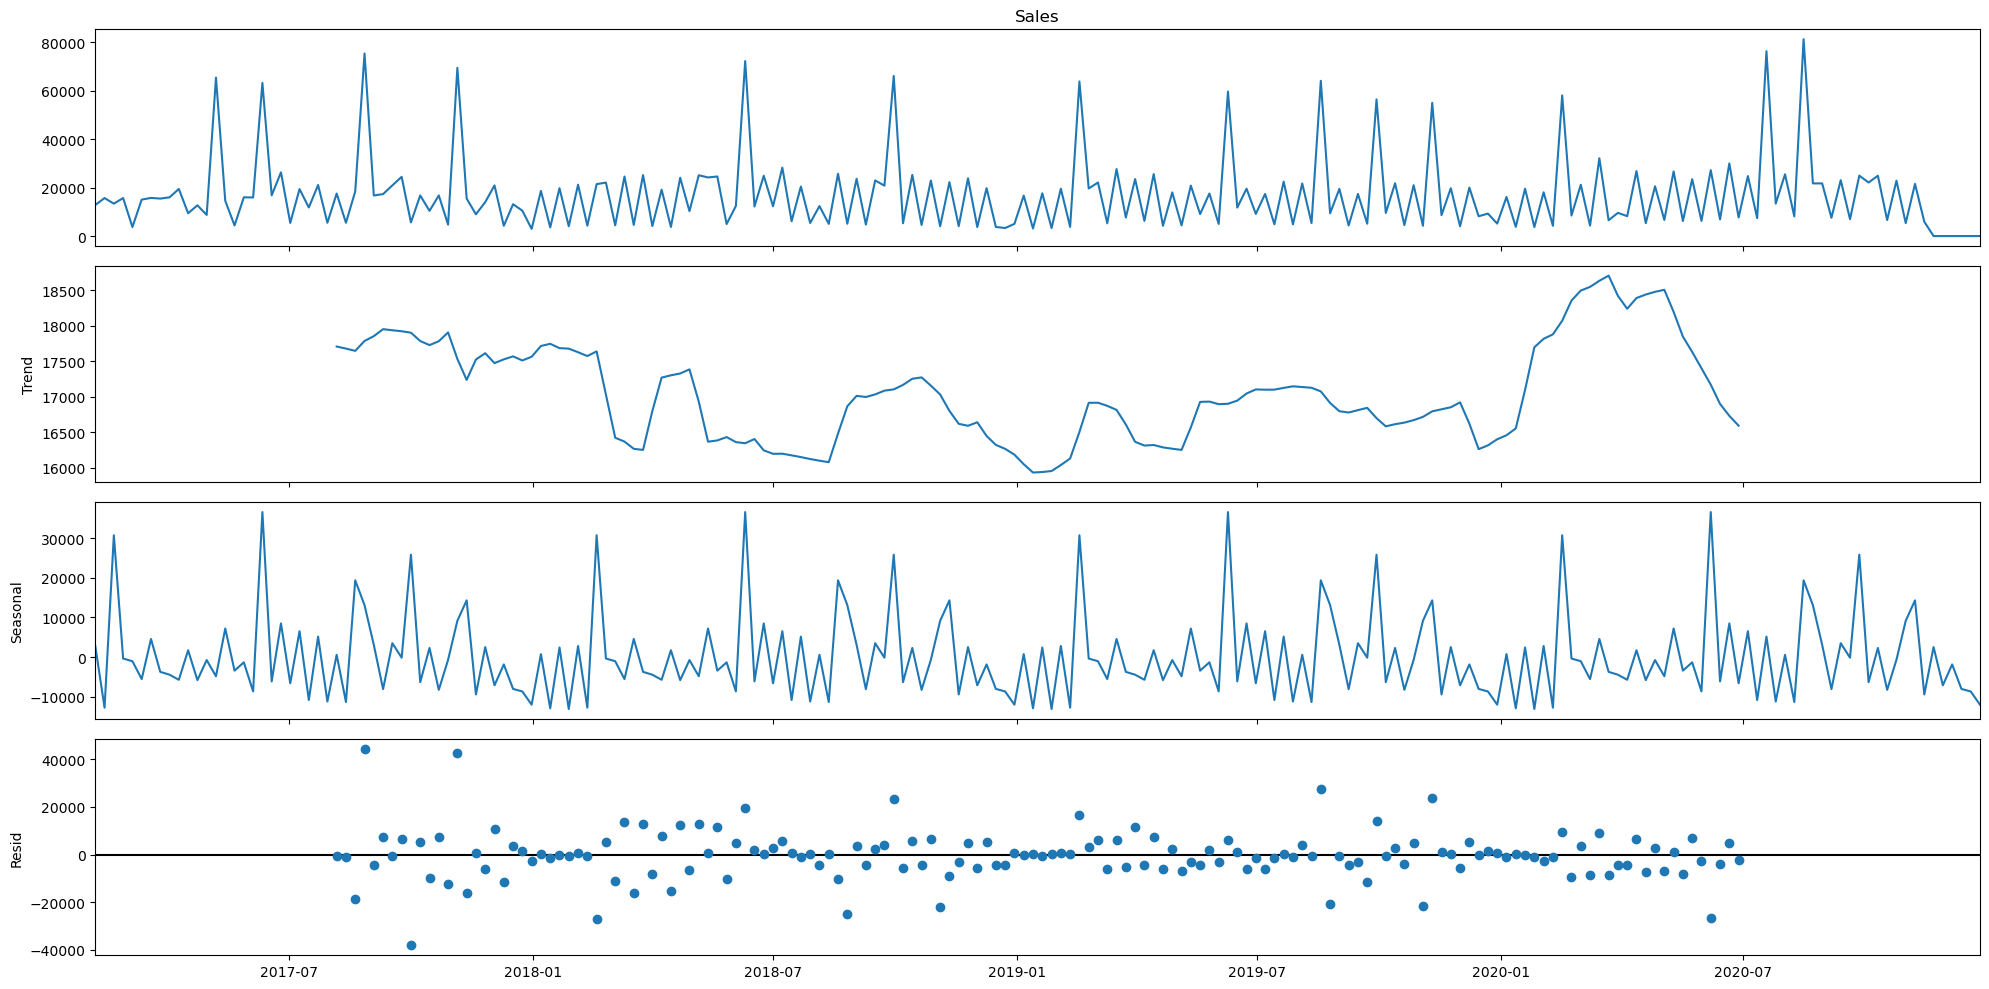

Trend for SKU5


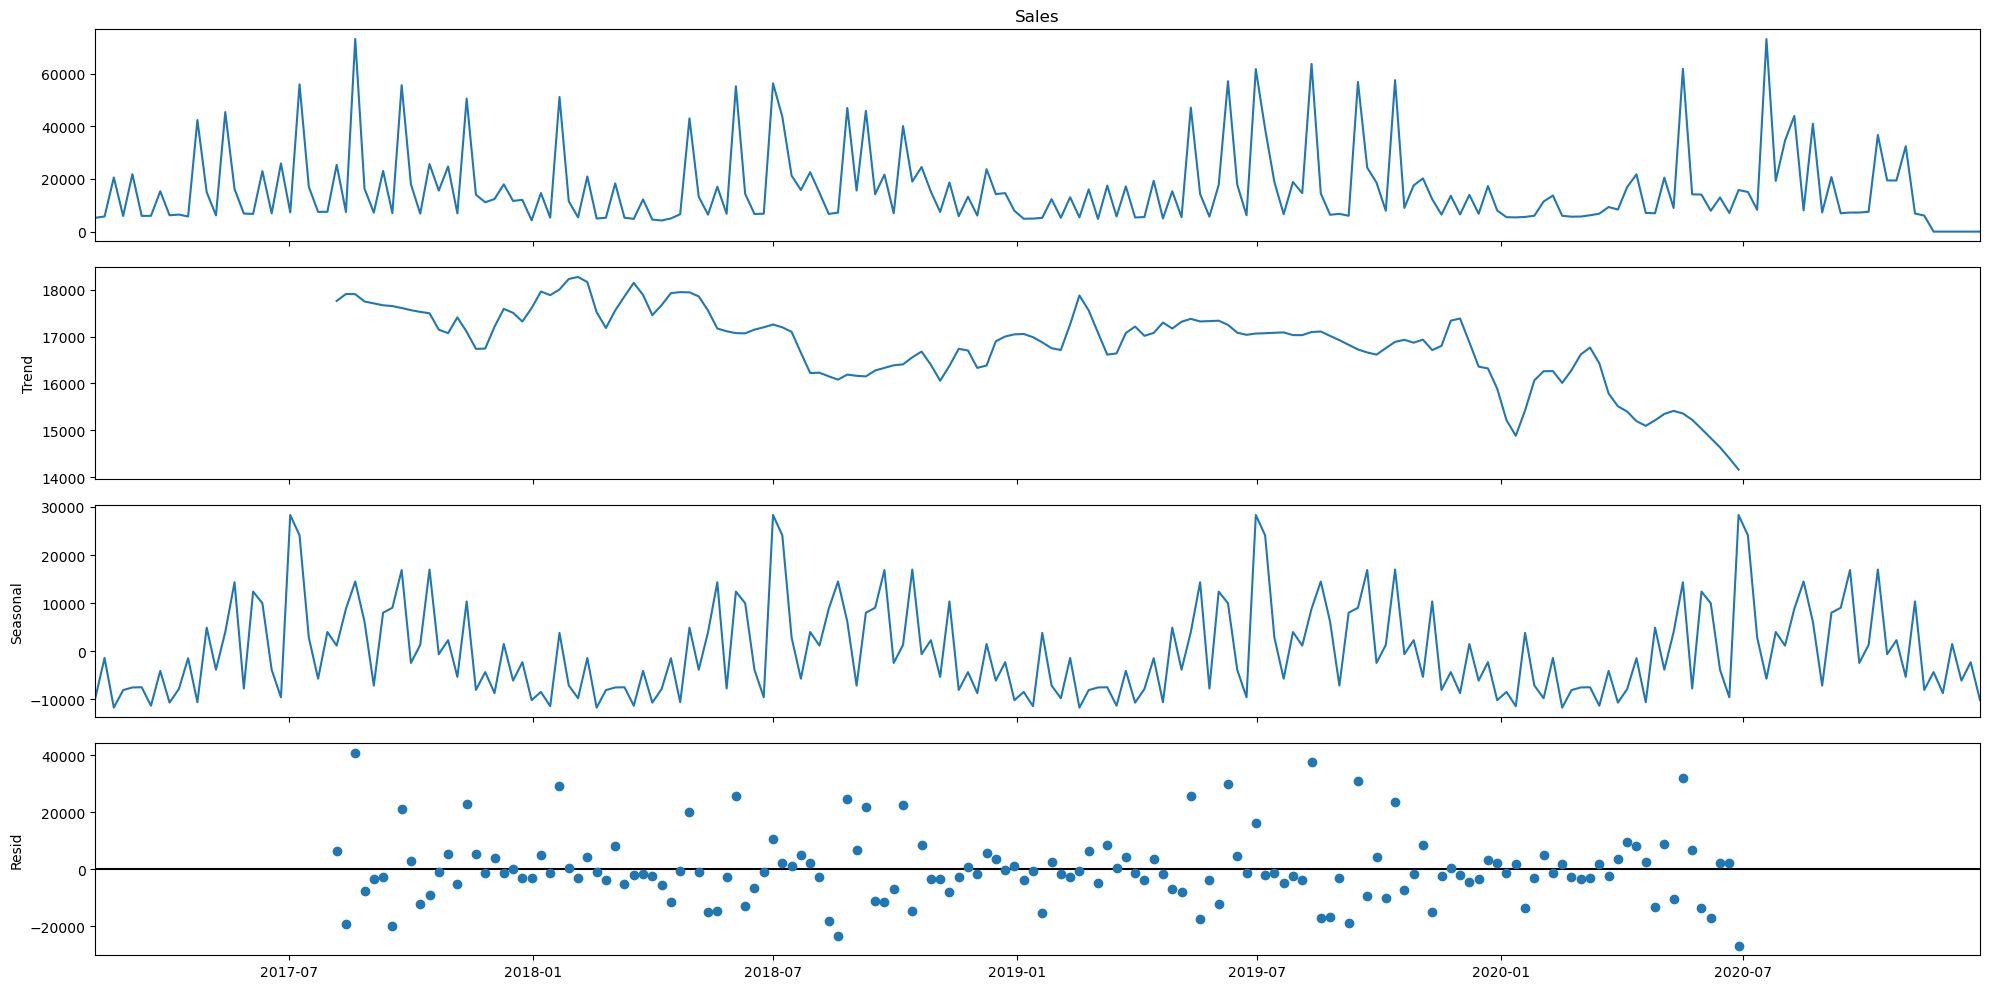

Trend for SKU6


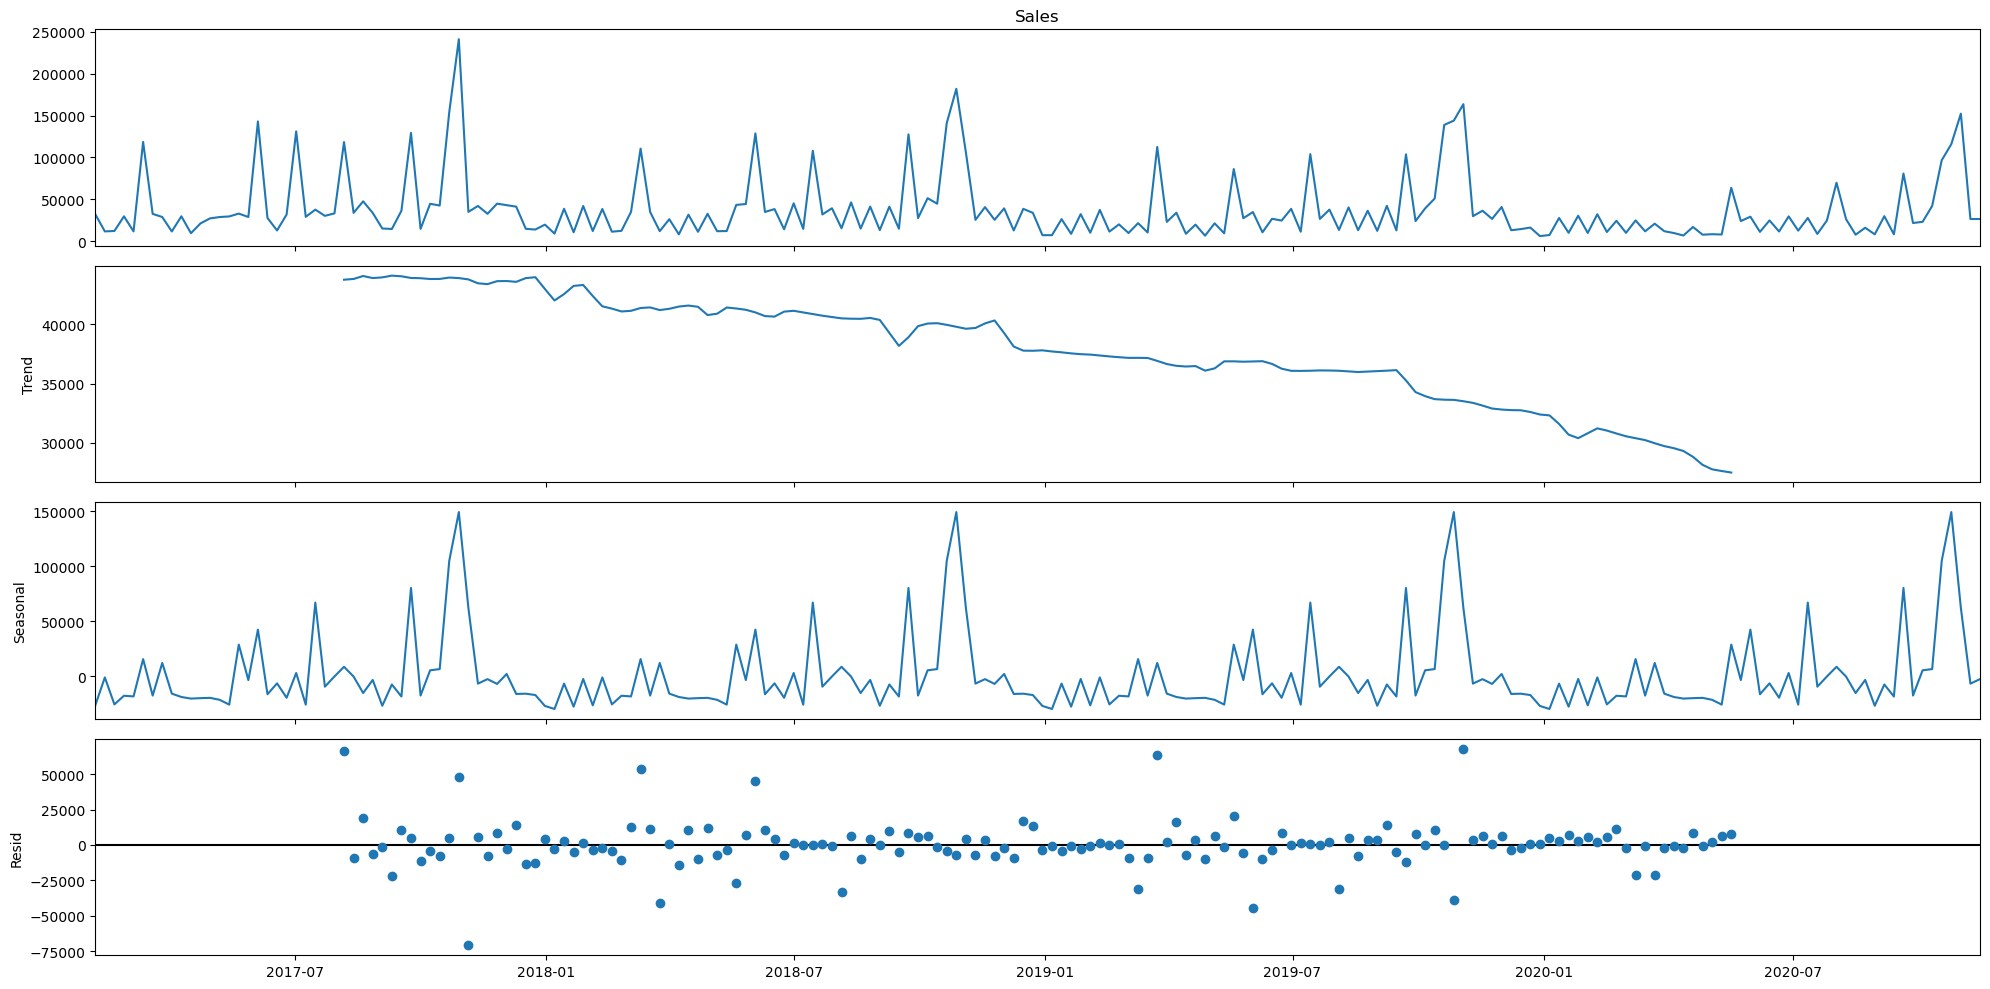

In [32]:
for i in range(2, 7):
    product = "SKU" + str(i)
    product_data = sales_data[sales_data["Product"] == product]
    product_series = product_data.set_index('date').asfreq('W')
    series = pd.Series(product_series['Sales'], index= product_series.index)
    results = seasonal_decompose(series, model='additive')
    print('Trend for ' + product)
    plt.rcParams['figure.figsize'] = (20.0, 10.0)
    results.plot()
    plt.show()

We can see that all products have some seasonal trend that seems to be able to explain the outliers are not "wrong" records, but part of the trend. Thus again, we will transform the data to deal with them.